In [3]:
# Import SQLContext
import findspark
findspark.init()

from pyspark.sql import SQLContext
import pyspark
sc = pyspark.SparkContext()
# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

# Read JSON data into a DataFrame object `df`
df = sqlCtx.read.json("census_2010.json")

# Print the type
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [4]:

df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



In [6]:
df.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In [7]:
first_five = df.head(5)
for r in first_five:
    print(r.age)

0
1
2
3
4


In [8]:
df[['age']].show()

df[['age', 'males', 'females']].show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
|  5|2091803|2005925|
|  6|2093905|2007781|
|  7|2097080|2010281|
|  8|2101670|2013771|
|  9|2108014|2018603|
| 10|2114217|2023289|
| 11|2118390|2026352|
| 12|2132030|2037286|
| 13|2159943|2060100|
| 14|2195773|2089651|
| 15|2229339|2117689|
| 16|2263862|2146942|
| 17|2285295|2165852|
| 18|2285990|2168175|
| 19|2272689|2159571|
+---+-------+-------+
only showing top 20 rows



In [9]:
five_plus = df[df['age'] > 5]
five_plus.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
| 20|2151448|2259690|4411138|2010|
| 21|2140926|2244039|4384965|2010|
| 22|2133510|2229168|4362678|2010|
| 23|2132897|2218195|4351092|2010|
| 24|2135789|2208905|4344694|2010|
| 25|2136497|2197148|4333645|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



In [10]:
df.count()

101

In [11]:
df[df['males'] > df['females']].show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



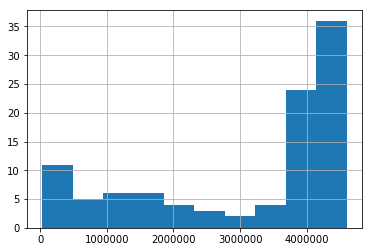

In [13]:
pandas_df = df.toPandas()
import matplotlib.pyplot as plt
%matplotlib inline
pandas_df['total'].hist()

### Spark SQL

In [14]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
df = sqlCtx.read.json("census_2010.json")

In [17]:
df.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In [19]:
df.registerTempTable("census2010")

tables = sqlCtx.tableNames()
print(tables)

['census2010']


In [20]:
sqlCtx.sql("SELECT age FROM census2010").show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows



In [21]:
query = 'SELECT males, females FROM census2010 WHERE age > 5 and age < 15'

sqlCtx.sql(query).show()

+-------+-------+
|  males|females|
+-------+-------+
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
|2118390|2026352|
|2132030|2037286|
|2159943|2060100|
|2195773|2089651|
+-------+-------+



In [22]:
df_m_f = sqlCtx.sql('SELECT males, females FROM census2010')


df_m_f.show()

+-------+-------+
|  males|females|
+-------+-------+
|2085528|1994141|
|2087350|1997991|
|2088549|2000746|
|2089465|2002756|
|2090436|2004366|
|2091803|2005925|
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
|2118390|2026352|
|2132030|2037286|
|2159943|2060100|
|2195773|2089651|
|2229339|2117689|
|2263862|2146942|
|2285295|2165852|
|2285990|2168175|
|2272689|2159571|
+-------+-------+
only showing top 20 rows



In [24]:

df_m_f.describe().show()

+-------+------------------+-----------------+
|summary|             males|          females|
+-------+------------------+-----------------+
|  count|               101|              101|
|   mean|1520095.3168316833|1571460.287128713|
| stddev|  818587.208016823|748671.0493484351|
|    min|              4612|            25673|
|    max|           2285990|          2331572|
+-------+------------------+-----------------+

